In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'IPAGothic'
# または
# plt.rcParams['font.family'] = 'Noto Sans CJK JP'

### 図1
$$
P_3 (L)=\frac{\omega_3}{\omega_2} P_{20} \sin^2(\kappa\sqrt{\frac{\omega_2}{\omega_3}P_{10}}L)
$$
ただし
$$
\kappa = \varepsilon_0 \sqrt{\frac{18\omega^2}{N^\omega N^{2\omega} N^{3\omega}} (\frac{\mu_0}{\varepsilon_0})^{3/2} \frac{(d_{eff})^2}{S_{eff}}}
$$
ただし
$$
S_{eff} = \frac{3}{4}\pi w_x w_y
$$
$$
d_{eff} = \frac{2}{\pi} d_{33}
$$

In [3]:
import math


def P3(L, omega3, omega2, P20, kappa, P10):
    """
    Parameters:
    L: Length parameter
    omega3: ω3 parameter
    omega2: ω2 parameter
    P20: P20 parameter
    kappa: κ parameter
    P10: P10 parameter

    Returns:
    P3(L) = (ω3/ω2) * P20 * sin²(κ * √(ω2/ω3 * P10) * L)
    """
    return (omega3/omega2) * P20 * (math.sin(kappa() * math.sqrt(omega2/omega3 * P10) * L))**2


def kappa(epsilon0, omega, N_omega, N_2omega, N_3omega, mu0, d_eff, S_eff):
    """
    Parameters:
    epsilon0: ε0 (真空の誘電率)
    omega: ω (角周波数)
    N_omega: Nω
    N_2omega: N2ω
    N_3omega: N3ω
    mu0: μ0 (真空の透磁率)
    d_eff: 実効非線形光学定数
    S_eff: 実効断面積

    Returns:
    κ = ε0 * √(18ω²/(NωN2ωN3ω) * (μ0/ε0)^(3/2) * (d_eff)²/S_eff)
    """
    return epsilon0 * math.sqrt(
        (18 * omega**2) / (N_omega * N_2omega * N_3omega) *
        (mu0 / epsilon0)**(3/2) *
        (d_eff**2) / S_eff
    )


def S_eff(w_x, w_y):
    """
    Parameters:
    w_x: x方向のビーム幅
    w_y: y方向のビーム幅

    Returns:
    S_eff = (3/4)π * w_x * w_y
    """
    return (3/4) * math.pi * w_x * w_y


def d_eff(d_33):
    """
    Parameters:
    d_33: d33非線形光学定数

    Returns:
    d_eff = (2/π) * d_33
    """
    return (2/math.pi) * d_33

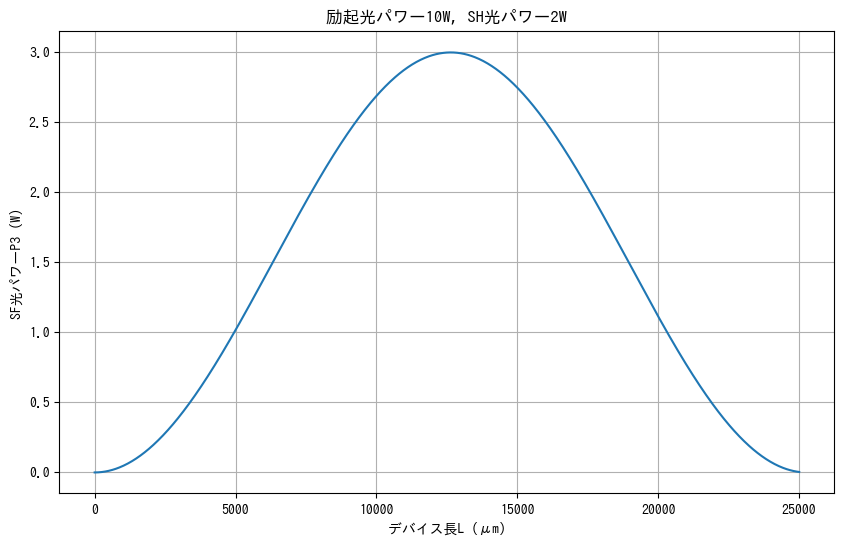

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np

# 基本パラメータ（与えられた値、μm単位系）
epsilon0 = 8.85e-18       # 真空の誘電率 (F/μm)
mu0 = 1.26e-12           # 真空の透磁率 (H/μm)
omega = 1.83e15          # 角周波数 (rad/s)
omega2 = 2 * omega       # 第二高調波の角周波数
omega3 = 3 * omega       # 第三高調波の角周波数

# 屈折率
N_omega = 2.13           # 基本波の屈折率
N_2omega = 2.20          # 第二高調波の屈折率
N_3omega = 2.36          # 第三高調波の屈折率

# ビーム関連パラメータ
w_x = 18.0              # ビーム半径x (μm)
w_y = 18.0              # ビーム半径y (μm)

# 非線形光学定数
d_33 = 0.0000138        # d33 (μm/V)

# パワー
P10 = 10                # 入射基本波パワー (W)
P20 = 2                 # 入射第二高調波パワー (W)

# 関数を使用してパラメータを計算
d_eff_value = d_eff(d_33)
s_eff_value = S_eff(w_x, w_y)
kappa_value = kappa(epsilon0, omega, N_omega, N_2omega,
                    N_3omega, mu0, d_eff_value, s_eff_value)

# Lの範囲を定義（0から500μm、1000点）
L_values = np.linspace(0, 25000, 1000)  # 長さの単位はμm

# P3の値を計算
P3_values = [(omega3/omega2) * P20 *
             (math.sin(kappa_value * math.sqrt(omega2/omega3 * P10) * L))**2
             for L in L_values]

# グラフ描画
plt.figure(figsize=(10, 6))
plt.plot(L_values, P3_values)
plt.xlabel('デバイス長L (μm)')
plt.ylabel('SF光パワーP3 (W)')
plt.title('励起光パワー10W, SH光パワー2W')
plt.grid(True)
plt.show()